In [1]:
from plotting_utils import *
from dataloader import *
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Deoxyfluorination dataset (Figure 3A)

In [2]:
# Looking at the top-4 conditions out of the 20 possible (4 bases x 5 sulfonyl fluorides)
full_deoxy_dataset = DeoxyDataset(for_regressor=False, component_to_rank="both", train_together=True, n_rxns=4)
full_deoxy_rankings = full_deoxy_dataset.y_ranking

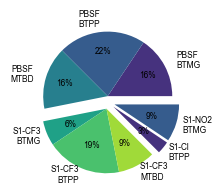

In [3]:
best_condition_frequency = Counter(np.where(full_deoxy_rankings == 1)[1])
bases = ["DBU", "MTBD", "BTMG", "BTPP"]
sulfonyl_fluorides = ["S1-Cl", "PyFluor", "S1-CF3", "S1-NO2", "PBSF"]
condition_labels = []
frequency = []
for cond_ind, freq in best_condition_frequency.items():
    base_name = bases[int(cond_ind)//5]
    sf_name = sulfonyl_fluorides[int(cond_ind)%5]
    condition_labels.append(f"{sf_name}\n{base_name}")
    frequency.append(freq)


fig, ax = plt.subplots(figsize=(2,2))
colors = sns.color_palette("viridis")
wedges, texts, percs = ax.pie(
    [x for _, x in sorted(zip(condition_labels, frequency))], 
    labels=sorted(condition_labels), 
    colors=colors, autopct="%.0f%%", 
    explode=[0.1 if "PBSF" in x else 0 for x in sorted(condition_labels)], 
    textprops={"fontfamily":"arial","fontsize":6}
)

groups = [[0,1,2], [3,4,5], [6], [7]]
radfraction = 0.1
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
ax.autoscale(True)
plt.savefig(f"figures/SI/FigureS1_deoxy_complete.svg", dpi=300, format="svg")

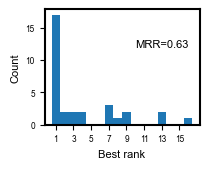

In [4]:
# 
best_rank_of_most_reactive_sf = np.min(full_deoxy_rankings[:, [4, 9, 14, 19]], axis=1)
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.hist(best_rank_of_most_reactive_sf, bins=np.arange(1,18), align="left", rwidth=0.95)
ax.set_xlabel("Best rank", fontdict={"fontfamily":"arial", "fontsize":8})
ax.set_ylabel("Count", fontdict={"fontfamily":"arial", "fontsize":8})
ax.set_xticks(np.arange(1,17,2))
ax.set_xticklabels(np.arange(1,17,2), fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_yticks(np.arange(0,16,5))
ax.set_yticklabels(np.arange(0,16,5), fontdict={"fontfamily":"arial", "fontsize":6})
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5)
mrr = float(np.mean(np.reciprocal(np.array(best_rank_of_most_reactive_sf, dtype=np.float16))))
ax.annotate(
    f"MRR={round(mrr, 2)}", 
    xy=(10,12),
    fontfamily="arial",
    fontsize=8
)
plt.savefig(f"figures/SI/FigureS1B_deoxy_complete.svg", dpi=300, format="svg")

In [5]:
each_deoxy_dataset = DeoxyDataset(for_regressor=False, component_to_rank="base", train_together=False, n_rxns=1)
separate_deoxy_ranks = each_deoxy_dataset.y_ranking

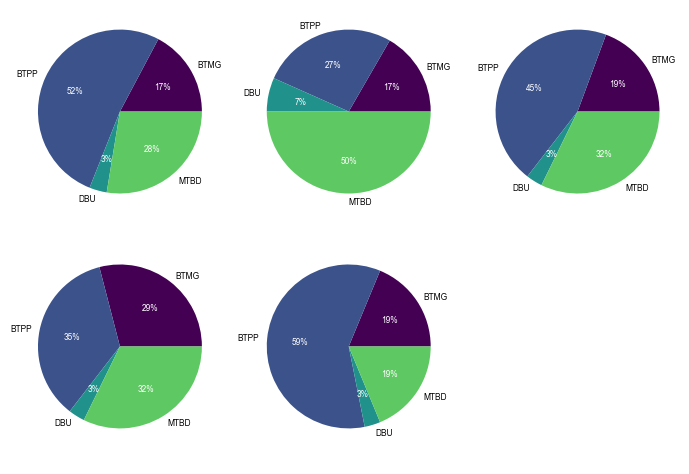

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7,5), tight_layout=True)

for i, rank_array in enumerate(separate_deoxy_ranks) :
    best_base_frequency = {bases[k]:v for k, v in Counter(np.where(rank_array == 1)[1]).items()}
    wedges, texts, percs = ax[i//3, i%3].pie(
        [x for _, x in sorted(zip(best_base_frequency.keys(), best_base_frequency.values()))], 
        labels=sorted(best_base_frequency.keys()), 
        colors=["#440154", "#3b528b", "#21918c", "#5ec962"], 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":6}
    )
    [x.set_color("white") for x in percs]
ax[1, 2].axis(False)
plt.savefig(f"figures/SI/FigureS2_deoxy_separate.svg", dpi=300, format="svg")

### Nature Dataset (Figure 3B)

(24, 4)
(61, 4)
(32, 4)
(19, 4)


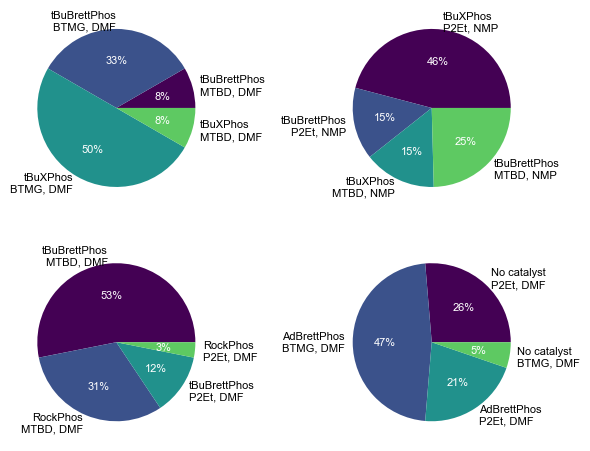

In [3]:
nature_nucs = ["amide", "amine", "sulfonamide", "thiol"]
conditions = [
    ["tBuBrettPhos\nMTBD, DMF", "tBuBrettPhos\nBTMG, DMF", "tBuXPhos\nMTBD, DMF", "tBuXPhos\nBTMG, DMF"],
    ["tBuXPhos\nP2Et, NMP", "tBuXPhos\nMTBD, NMP", "tBuBrettPhos\nP2Et, NMP", "tBuBrettPhos\nMTBD, NMP"],
    ["RockPhos\nMTBD, DMF", "RockPhos\nP2Et, DMF", "tBuBrettPhos\nMTBD, DMF", "tBuBrettPhos\nP2Et, DMF"],
    ["No catalyst\nP2Et, DMF", "No catalyst\nBTMG, DMF", "AdBrettPhos\nP2Et, DMF", "AdBrettPhos\nBTMG, DMF"]
]
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), tight_layout=True)
for i, nuc in enumerate(nature_nucs) : 
    nature_dataset = NatureDataset(for_regressor=False, component_to_rank=nuc, n_rxns=1)
    rank_array = nature_dataset.y_ranking
    print(rank_array.shape)
    best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
    wedges, texts, percs = ax[i//2, i%2].pie(
        best_cond_frequency.values(), 
        labels=[conditions[i][x] for x in best_cond_frequency.keys()],
        colors=["#440154", "#3b528b", "#21918c", "#5ec962"], 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":8}
    )
    [x.set_color("white") for x in percs]

plt.savefig(f"figures/SI/FigureS3_natureHTE_v2.svg", dpi=300, format="svg")

### Science Dataset (Figure 3C and 3D)

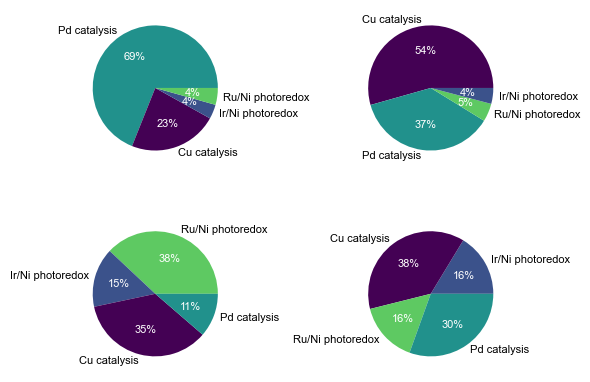

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), tight_layout=True)
components = ["whole_amine", "whole_bromide"]
conditions = ["Cu catalysis", "Ir/Ni photoredox", "Pd catalysis", "Ru/Ni photoredox"]
colors=["#440154", "#3b528b", "#21918c", "#5ec962"]
for i, component in enumerate(components) : 
    science_dataset = ScienceDataset(for_regressor=False, component_to_rank=component, n_rxns=1)
    rank_array = science_dataset.y_ranking
    best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
    wedges, texts, percs = ax[0, i].pie(
        best_cond_frequency.values(), 
        labels=[conditions[x] for x in best_cond_frequency.keys()],
        colors=[colors[x] for x in best_cond_frequency.keys()], 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":8}
    )
    [x.set_color("white") for x in percs]
    next_cond_freq = Counter(np.where(rank_array == 2)[1])
    wedges, texts, percs = ax[1, i].pie(
        next_cond_freq.values(), 
        labels=[conditions[x] for x in next_cond_freq.keys()],
        colors=[colors[x] for x in next_cond_freq.keys()], 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":8}
    )
    [x.set_color("white") for x in percs]

plt.savefig(f"figures/SI/FigureS4_science.svg", dpi=300, format="svg")

### Informer dataset (Figure 3E, i.e. dual nickel-photoredox dataset)

2
2
2


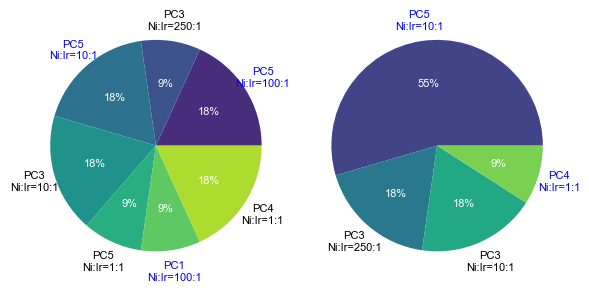

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(6,3), tight_layout=True)

informer_dataset = InformerDataset(for_regressor=False, component_to_rank="catalyst_ratio", train_together=False, n_rxns=4)
rank_arrays = informer_dataset.y_ranking
yield_arrays = informer_dataset.y_yield
photocatalysts = [f"PC{i+1}" for i in range(5)]
ratio = ["Ni:Ir=250:1", "Ni:Ir=100:1", "Ni:Ir=10:1", "Ni:Ir=1:1"] 

for i, (rank_array, yield_array) in enumerate(zip(rank_arrays, yield_arrays)) :
    best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
    best_four_conds = np.argsort(np.mean(yield_array, axis=0))[::-1][:4]
    wedges, texts, percs = ax[i].pie(
        best_cond_frequency.values(), 
        labels=[f"{photocatalysts[x//4]}\n{ratio[x%4]}" for x in best_cond_frequency.keys()],
        colors=sns.color_palette("viridis", n_colors=len(best_cond_frequency.values())), 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":8,"ha":"center"},
        labeldistance=1.2
    )
    [x.set_color("white") for x in percs]
    for text in texts :
        photocat, ratio_val = text.get_text().split()
        num = 4*photocatalysts.index(photocat) + ratio.index(ratio_val)
        if num in best_four_conds :
            text.set_color("blue")
        else :
            text.set_color("black")
    
plt.savefig(f"figures/SI/FigureS6_informer.svg", dpi=300, format="svg")

### Ullmann dataset (Figure 3F)

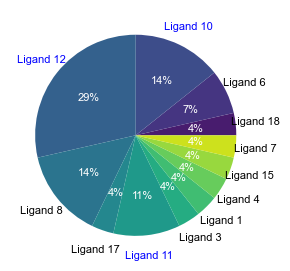

In [14]:
fig, ax = plt.subplots(figsize=(3,3), tight_layout=True)

ullmann_dataset = UllmannDataset(for_regressor=False, n_rxns=3)
rank_array = ullmann_dataset.y_ranking
yield_array = ullmann_dataset.y_yield
best_four_ligands = np.argsort(np.mean(yield_array, axis=0))[::-1][:4]

best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
wedges, texts, percs = ax.pie(
    best_cond_frequency.values(), 
    labels=[f"Ligand {x+1}" for x in best_cond_frequency.keys()],
    colors=sns.color_palette("viridis", n_colors=len(best_cond_frequency.values())), 
    autopct="%.0f%%",
    textprops={"fontfamily":"arial","fontsize":8,"ha":"center"},
    labeldistance=1.2
)
[x.set_color("white") for x in percs]
for text in texts :
    ligand_ind = int(text.get_text().split()[1]) - 1
    if ligand_ind in best_four_ligands :
        text.set_color("blue")
    else :
        text.set_color("black")
    
plt.savefig(f"figures/SI/FigureS7_ullmann.svg", dpi=300, format="svg")

### C–H Borylation dataset (Figure 3G)

/Users/eunjaeshim/Documents/GitHub/LabelRanking/dataloader.py:1600: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  partial_df = entire_df[entire_df["solvent"] != "N#CC"][


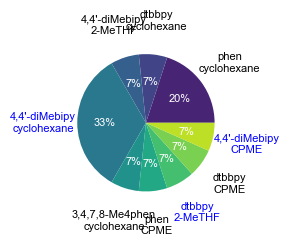

In [11]:
fig, ax = plt.subplots(figsize=(3,3), tight_layout=True)

borylation_dataset = BorylationDataset(for_regressor=False, n_rxns=3)
rank_array = borylation_dataset.y_ranking
yield_array = borylation_dataset.y_yield
best_three_conds = np.argsort(np.mean(yield_array, axis=0))[::-1][:3]
best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
solvents = ["CPME", "2-MeTHF", "cyclohexane"]
ligands = ["3,4,7,8-Me4phen", "phen", "4,4'-diMebipy", "dtbbpy"]

wedges, texts, percs = ax.pie(
    best_cond_frequency.values(), 
    labels=[f"{ligands[x%4]}\n{solvents[x//4]}" for x in best_cond_frequency.keys()],
    colors=sns.color_palette("viridis", n_colors=len(best_cond_frequency.values())), 
    autopct="%.0f%%",
    textprops={"fontfamily":"arial","fontsize":8,"ha":"center"},
    labeldistance=1.5
)
[x.set_color("white") for x in percs]
for text in texts :
    ligand_name, solvent_name = text.get_text().split()
    if int(solvents.index(solvent_name)*4 + ligands.index(ligand_name)) in best_three_conds :
        text.set_color("blue")
    else :
        text.set_color("black")
    
plt.savefig(f"figures/SI/FigureS8_ch_borylation.svg", dpi=300, format="svg")

### Aryl halide borylation dataset (Figure 3H)

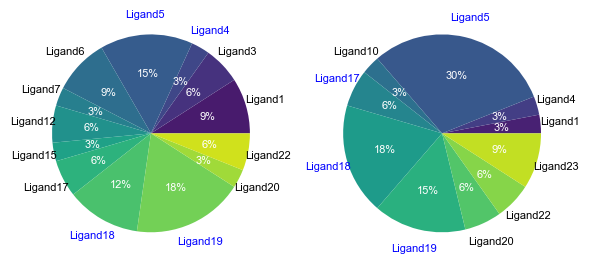

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(6,3), tight_layout=True)

for i, solvent in enumerate(["MeOH", "EtOH"]) :
    borylation_dataset = ArylBorylationDataset(for_regressor=False, component_to_rank=solvent,  n_rxns=3)
    rank_array = borylation_dataset.y_ranking
    yield_array = borylation_dataset.y_yield
    best_cond_frequency = Counter(np.argmin(rank_array, axis=1))
    best_four_ligands = np.argsort(np.mean(yield_array, axis=0))[::-1][:4]+1
    
    wedges, texts, percs = ax[i].pie(
        [x for _, x in sorted(zip(best_cond_frequency.keys(), best_cond_frequency.values()))],
        labels=[f"Ligand{x+1}" for x in sorted(best_cond_frequency.keys())],
        colors=sns.color_palette("viridis", n_colors=len(best_cond_frequency.values())), 
        autopct="%.0f%%",
        textprops={"fontfamily":"arial","fontsize":8,"ha":"center"},
        labeldistance=1.2,
    )
    [x.set_color("white") for x in percs]
    for text in texts :
        if int(text.get_text()[6:]) in best_four_ligands :
            text.set_color("blue")
        else :
            text.set_color("black")
    
plt.savefig(f"figures/SI/FigureS9_ArX_borylation.svg", dpi=300, format="svg")